In [1]:
import pandas as pd
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv')
#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())
#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())
#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()
#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty
#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 
#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 
#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)
#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  ...  CustomerID      City
0     536365   WHITE HANGING HEART T-LIGHT HOLDER  ...       17850  Surabaya
1     536366                  WHITE METAL LANTERN  ...       17850  Surabaya
2     536367       CREAM CUPID HEARTS COAT HANGER  ...       17850  Surabaya
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE  ...       17850   Jakarta
4     536369       RED WOOLLY HOTTIE WHITE HEART.  ...       17850     Medan

[5 rows x 7 columns]

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


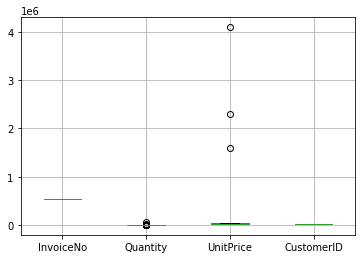

In [2]:
import matplotlib.pyplot as plt
#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [3]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]
#check for duplication
print(uncleaned_raw.duplicated(subset=None))
#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool
